# <img src="https://img.icons8.com/dusk/64/000000/mind-map.png" style="height:50px;display:inline"> CS 236756 - Technion - Intro to Machine Learning
---
#### Tal Daniel

## Tutorial 09 - Linear Models
---

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---
* [Definition](#-Definition-of-Linear-Models)
* [Discriminative Models](#-Discriminative-Models)
    * [Perceptron](#-The-Perceptron)
    * [Least Mean Square - LMS (Adaptive Linear Neuron - ADALINE)](#-Least-Mean-Square---LMS-(Adaptive-Linear-Neuron---ADALINE))
    * [Logistic Regression](#-Logistic-Regression)
* [Generative Models](#-Generative-Models)
    * [Maximum A Posteriori - MAP](#-Maximum-A-Posteriori-(MAP))
    * [Quadratic Discriminant Analysis - QDA](#-Gaussian-Assumption---Quadratic-Discriminant-Analysis---QDA)
    * [Naive Bayes](#-Gaussian-Assumption---Naive-Bayes-Classifier)
    * [Linear Discriminant Analysis - LDA](#-Gaussian-Assumption---Linear-Discriminant-Analysis---LDA)
* [One vs. All Classification](#-One-Vs.-All-Classification)
* [Recommended Videos](#-Recommended-Videos)
* [Credits](#-Credits)

In [1]:
# imports for the tutorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

### <img src="https://img.icons8.com/dusk/64/000000/define-location.png" style="height:50px;display:inline"> Definition of Linear Models
---
Methods that give **linear decision boundries** between classes $$ \{ x| w^Tx + w_0 =0\} $$
where $x$ are the data points. Given binary classification problem with classes 0 and 1, when $w^Tx + w_0 \geq 0$ then points are usually classified as 1 and otherwise as 0. 

<img src="./assets/tut_09_lin_models.jpg" style="height:200px">

* In statistical classification, including machine learning, two main approaches are called the **generative** approach and the **discriminative** approach. 
* These compute classifiers by different approaches, differing in the degree of statistical modeling.

## <img src="https://img.icons8.com/nolan/64/000000/categorize.png" style="height:50px;display:inline"> Discriminative Models
---
* **Discriminative models** are a class of models used in statistical classification, especially in supervised machine learning. A discriminative classifier tries to build a model just by depending on the observed data while learning how to do the classification from the given statistics.  
    * Comparing with the generative models, discriminative models make fewer assumptions on the distributions but depends heavily on the quality of the data.
    * For example, given a set of labeled pictures of dog and rabbit, discriminative models will be matching a new, unlabeled picture to a most similar labeled picture and then give out the label class, a dog or a rabbit.
* The typical discriminative learning approaches include Logistic Regression (LR), Support Vector Machine (SVM), conditional random fields (CRFs) (specified over an undirected graph), and others.

### <img src="https://img.icons8.com/plasticine/100/000000/mind-map.png" style="height:50px;display:inline"> The Perceptron
---
* One of the first and simplest linear model.
* Based on a *linear threshold unit* (LTU): the input and output are numbers (not binary values), and each connection is associated with a weight.
* The LTU computes a weighted sum of its inputs: $z = w_1x_1 + w_2x_2 +....+w_nx_n = w^Tx$, and then it applies a **step function** to that sum and outputs the result: $$ h_w(x) = step(z) = step(w^Tx) $$


* Illustration: <img src="./assets/tut_09_perceptron.jpg" style="height:200px">
* The most common step function used is the *Heaviside step function* but sometimes the *sign function* is used (as is the illustration).

* **Perceptron Training** draws inspiration from biological neurons: the connection weight between two neurons is increased whenever they have **the same output**. Perceptrons are trained by considering the error made.
    * At each iteration, the Perceptron is fed with one training instance and makes a prediction for it.
    * For every output that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction.
    * Criterion: $ E^{perc}(w) = - \sum_{i \in D_{miss}}w^T(x^iy^i) $
* **Perceptron Learning Rule (weight update)**: $$ w_{t+1} = w_t +\eta(y_i -sign(w_t^Tx_i))x_i $$
    * $\eta$ is the learing rate
* The decision boundary learned is linear, the Perceptron is incapable of learning complex patterns.

* **Perceptron Convergence Theorem**: If the training instances are **linearly seperable**, the algorithm would converge to a solution.
    * **There can be multiple solutions (multiple hyperplanes)**
* Perceptrons do not output a class probability, they just make predicitons based on a **hard threshold**.

In [2]:
# let's load the cancer dataset, shuffle it and  speratre into train and test set
dataset = pd.read_csv('./datasets/cancer_dataset.csv')
# print the number of rows in the data set
number_of_rows = len(dataset)
num_train = int(0.8 * number_of_rows)
# reminder, the data looks like this
dataset.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
531,91903901,B,11.670,20.02,75.21,416.2,0.10160,0.09453,0.04200,0.02157,...,28.81,87.00,550.6,0.15500,0.29640,0.27580,0.08120,0.3206,0.08950,NaN
356,9010259,B,13.050,18.59,85.09,512.0,0.10820,0.13040,0.09603,0.05603,...,24.85,94.22,591.2,0.13430,0.26580,0.25730,0.12580,0.3113,0.08317,NaN
43,856106,M,13.280,20.28,87.32,545.2,0.10410,0.14360,0.09847,0.06158,...,28.00,113.10,907.2,0.15300,0.37240,0.36640,0.14920,0.3739,0.10270,NaN
69,859487,B,12.780,16.49,81.37,502.5,0.09831,0.05234,0.03653,0.02864,...,19.76,85.67,554.9,0.12960,0.07061,0.10390,0.05882,0.2383,0.06410,NaN
141,869104,M,16.110,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.05943,...,25.27,129.00,1233.0,0.13140,0.22360,0.28020,0.12160,0.2792,0.08158,NaN
499,91485,M,20.590,21.24,137.80,1320.0,0.10850,0.16440,0.21880,0.11210,...,30.76,163.20,1760.0,0.14640,0.35970,0.51790,0.21130,0.2480,0.08999,NaN
504,915186,B,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,...,16.38,69.05,300.2,0.19020,0.34410,0.20990,0.10250,0.3038,0.12520,NaN
358,9010333,B,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.02381,...,17.70,65.27,302.0,0.10150,0.12480,0.09441,0.04762,0.2434,0.07431,NaN
270,8910721,B,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,...,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120,NaN
568,92751,B,7.760,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039,NaN


In [3]:
# we will take the first 2 features as our data (X) and the diagnosis as labels (y)
x = dataset[['radius_mean', 'texture_mean']].values
y = dataset['diagnosis'].values == 'M'  # 1 for Malignat, 0 for Benign
# shuffle
rand_gen = np.random.RandomState(0)
shuffled_indices = rand_gen.permutation(np.arange(len(x)))

x_train = x[shuffled_indices[:num_train]]
y_train = y[shuffled_indices[:num_train]]
x_test = x[shuffled_indices[num_train:]]
y_test = y[shuffled_indices[num_train:]]

print("total training samples: {}, total test samples: {}".format(num_train, number_of_rows - num_train))

total training samples: 455, total test samples: 114


In [4]:
def plot_dataset(x, y):
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x[y,0], x[y, 1], color='r', label="M")
    ax.scatter(x[~y,0], x[~y, 1], color='b', label="B")
    ax.legend()
    ax.grid()
    ax.set_xlabel("radius_mean")
    ax.set_ylabel("texture_mean")
    ax.set_title("texture_mean vs. radius_mean")

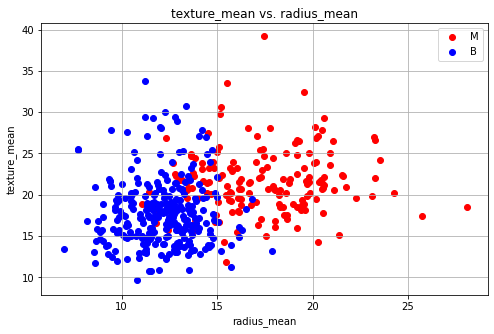

In [5]:
# let's see it
plot_dataset(x_train, y_train)

In [12]:
# perceptron using Scikit-Learn
from sklearn.linear_model import Perceptron
per_clf = Perceptron(max_iter=1000)
per_clf.fit(x_train, y_train)
y_pred = per_clf.predict(x_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("perceptron accuracy: {:.3f} %".format(accuracy * 100))
w = (per_clf.coef_).reshape(-1,)
b = (per_clf.intercept_).reshape(-1,)
boundary = (-b -w[0] * x_train[:, 0]) / w[1] 

perceptron accuracy: 71.930 %


In [13]:
def plot_perceptron_result():
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x_train[y_train,0], x_train[y_train, 1], color='r', label="M, train", alpha=0.5)
    ax.scatter(x_train[~y_train,0], x_train[~y_train, 1], color='b', label="B, train", alpha=0.5)
    ax.scatter(x_test[y_test,0], x_test[y_test, 1], color='r', label="M, test", alpha=1)
    ax.scatter(x_test[~y_test,0], x_test[~y_test, 1], color='b', label="B, test", alpha=1)
    ax.plot(x_train[:,0], boundary, label="decision boundary", color='g')
    ax.legend()
    ax.grid()
    ax.set_ylim([5, 40])
    ax.set_xlabel("radius_mean")
    ax.set_ylabel("texture_mean")
    ax.set_title("texture_mean vs. radius_mean")

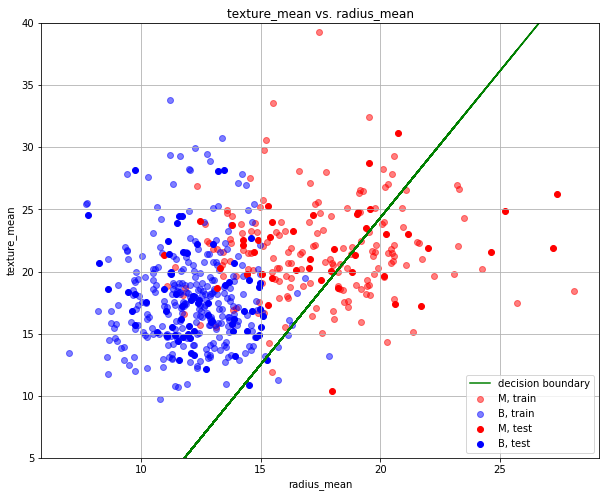

In [14]:
# plot
plot_perceptron_result()

### <img src="https://img.icons8.com/dotty/80/000000/square-number.png" style="height:50px;display:inline"> Least Mean Square - LMS (Adaptive Linear Neuron - ADALINE)
---
* Adaline is a single layer neural network with multiple nodes where each node accepts multiple inputs and generates one output.
* The difference between Adaline and the standard Perceptron is that in the learning phase, the weights are adjusted according to the weighted sum of the inputs (the net). In the standard Perceptron, the net is passed to the activation function (step() or sign() and the function's output is used for adjusting the weights.
* Criterion: $ E(w) = \frac{1}{2} \sum_{i \in D} (y_i -w^Tx_i)^2 $
* **ADALINE Training**:
    * SGD or Pseudo-inverse
    * **ADALINE Learning Rule (weight update):** $$ w_{t+1} = w_t + \eta(y_i - w_t^Tx_i)x_i $$

* Training Process: 

<img src="./assets/tut_08_adaline.gif" style="height:300px">

#### <img src="https://img.icons8.com/ios/50/000000/battle.png" style="height:30px;display:inline"> LMS vs. Pereptron
---
<img src="./assets/tut_09_lms_perc.jpg" style="height:200px">


<img src="./assets/tut_08_perc_vs_ada.png" style="height:300px">

* Image and animation by <a href="https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html">Sebastian Raschka</a>
* Python implementation of ADALAINE using SGD can be found <a href="https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html">here</a>.

## <img src="https://img.icons8.com/dusk/64/000000/rewind.png" style="height:50px;display:inline"> Recap: Maximum Likelihood Estimation
---
* Maximum Likelihood Estimation (MLE) is the most common way to estimate parameters of a statistical model by calculating: $$\hat{\theta} = \underset{\theta}{\mathrm{argmax}} \log p(y|x, \theta) $$
* The Negative Log Likelhood (NLL) under **i.i.d** assumption: $$ NLL(\theta) = -\log p(D|\theta) = -\sum_{i=1}^n \log p(y_i|x_i, \theta) $$

### <img src="https://img.icons8.com/dusk/64/000000/cheap-2.png" style="height:50px;display:inline"> MLE with Bernoulli Assumption
---
* The *Sigmoid* function (also the Logistic Function): $$ \sigma(x) = \frac{1}{1+e^{-x}} = \frac{e^x}{1+e^x} $$
    * The output is in $[0,1]$, which is exactly what we need to model a probability distribution.
* We assume that: $$ P(y|x,\theta) = Bern(y|\sigma(\theta^Tx)) $$
    * Bernoulli Distribution (coin flip): $$ P(y) = p^y(1-p)^{1-y} $$
    * $p = \sigma(\theta^Tx) \in [0,1]$
* We will use the following notations: $$P(y_i|x_i, w) = \begin{cases}
    \pi_{i1} = \sigma(w^Tx) =  \frac{1}{1+e^{-x}}     & \quad \text{if } y_i=1 \\
    \pi_{i0} = 1 -  \sigma(w^Tx) = 1 -  \frac{1}{1+e^{-x}}    & \quad \text{if } y_i = 0  
  \end{cases} $$

In [40]:
# let's see the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-5, 5, 1000)
sig_x = sigmoid(x)

Text(0, 0.5, 'sigmoid(x)')

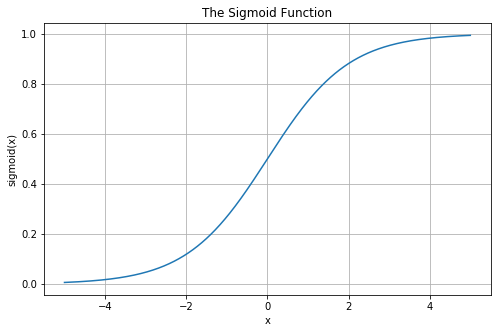

In [41]:
# plot
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.plot(x, sig_x)
ax.grid()
ax.set_title("The Sigmoid Function")
ax.set_xlabel("x")
ax.set_ylabel("sigmoid(x)")

### <img src="https://img.icons8.com/cotton/64/000000/combo-chart.png" style="height:50px;display:inline"> Logistic Regression
---
* Some regression algorithms can be used for **classification** as well.
* *Logistic Regression* is commonly used to **estimate the probability** that an instance belongs to a particular class.
    * Typically, if the estimated proabibility is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled "1"), or else it predicts that it does not - a binary classifier.
* **Estimating Probabilities** - Similarly to *Linear Regression*, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but unlike Linear Regression, it outputs the **logistic** of the weighted sum - $\sigma(w^Tx)$, which is a number between 0 and 1.

* **Training and Cost Function**:
    * The objective of training is to set the parameter vector $\theta$ (or $w$) so that the model estimates high probabilities for positive instances ($y=1$) and low probabilities for negative instances ($y=0$)
    * Expanding the expression: $$ P(y|x,\theta) = Bern(y|\sigma(\theta^Tx)) \rightarrow NLL(\theta) = -\frac{1}{m}\sum_{i=1}^n \log \sigma(\theta^Tx)^{y_i}(1-\sigma(\theta^Tx))^{1-y_i} =- \frac{1}{m} \sum_{i=1}^n\log\pi_{i1}^{y_i}\pi_{i0}^{1-y_i} $$
    $$ =  -\frac{1}{m} \sum_{i=1}^n \left[y_i\log\pi_{i1} + (1-y_i)\log\pi_{i0} \right]$$

* This yields **the Logistic Regression cost function (log loss)**: $$ J(\theta) = -\frac{1}{m} \sum_{i=1}^m \big[ y_i\log \pi_{i1} + (1-y_i)\log \pi_{i0} \big] = -\frac{1}{m} \sum_{i=1}^m \big[ y_i\log \pi_{i1} + (1-y_i)\log (1 - \pi_{i1}) \big] $$
    * Intuition: $-\log(t)$ grows very large when $t$ approaches 0, so the cost will be large if the model estimates a probability close to 0 for a **positive instance**, and it will also be very large if the estimated probability is close to 1 for a **negative instance**. On the other hand, $-log(t)$ is close to 0 when $t$ is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a **negative instance** or close to 1 for a **positive instance**.
    * This expression is also called the **binary cross-entropy (BCE)** loss.
    * The cost function is **convex**.

* **Logistic cost function derivatives**: $$ \frac{\partial}{\partial \theta_j}J(\theta) = \frac{1}{m}\sum_{i=1}^m \big( \sigma(\theta^Tx^{i}) - y_i \big) x_j^{i} $$
    * No closed-form solution.
    * Thanks to the convexity of the cost function, we can use **Gradient Descent** (or SGD, Mini-Batch GD).

In [46]:
def plot_lr_boundary(x_train, x_test, y_train, y_test, boundary):
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x_train[y_train,0], x_train[y_train, 1], color='r', label="M, train", alpha=0.5)
    ax.scatter(x_train[~y_train,0], x_train[~y_train, 1], color='b', label="B, train", alpha=0.5)
    ax.scatter(x_test[y_test,0], x_test[y_test, 1], color='r', label="M, test", alpha=1)
    ax.scatter(x_test[~y_test,0], x_test[~y_test, 1], color='b', label="B, test", alpha=1)
    ax.plot(x_train[:,0], boundary, label="decision boundary", color='g')
    ax.legend()
    ax.grid()
    ax.set_ylim([5, 40])
    ax.set_xlabel("radius_mean")
    ax.set_ylabel("texture_mean")
    ax.set_title("texture_mean vs. radius_mean")

In [47]:
# logistic regression with scikit-learn
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Logistic Regression accuracy: {:.3f} %".format(accuracy * 100))
w = (log_reg.coef_).reshape(-1,)
b = (log_reg.intercept_).reshape(-1,)
boundary = (-b -w[0] * x_train[:, 0]) / w[1] 

Logistic Regression accuracy: 90.351 %


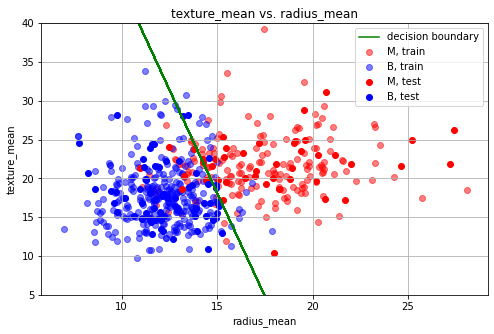

In [48]:
# plot
plot_lr_boundary(x_train, x_test, y_train, y_test, boundary)

### <img src="https://img.icons8.com/cotton/64/000000/network.png" style="height:50px;display:inline"> Multi-Class (Multinomial) Logistic Regression - Softmax Regression
---
* The Logistic Regression model can be generalized to support multiple classes.
* The idea: when given an instance $x$, the Softmax Regression model first computes a score $s_k(x)$ for each class $k$, then estimates a probability of each class by applying the *softmax function* (normalized exponential) to the scores.
* The **Softmax score for class $k$**: $$ s_k(x) = \big( \theta^{(k)} \big)^T \cdot x $$ 
    * Each class has its own dedicated parameter vector $\theta^{(k)}$, which is usually stored in a row of the parameter matrix $\Theta$.

* **The Softmax Function**: $$\hat{p}_k = p(y=k|x,\theta) = \sigma(s(x))_k = \frac{e^{s_k(x)}}{\sum_{j=1}^K e^{s_j(x)}} $$
    * $K$ is the number of classes.
    * $s(x)$ is a *vector* containing the scores of each class for the instance $x$
    * $\sigma(s(x))_k$ is the estimated probability that the instance $x$ belongs to class $k$ given the scores of each class for that instance.
* **The Softmax Regression classifier prediction**: $$\hat{y} = \underset{k}{\mathrm{argmax}} \sigma(s(x))_k = \underset{k}{\mathrm{argmax}} s_k(x) = \underset{k}{\mathrm{argmax}} \big( (\theta^{(k)})^Tx \big) $$

* **Cross-Entropy cost function**: $$ J(\Theta) = -\frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K y_k^{(i)} \log(\hat{p}_k^{(i)}) $$
    * $y_k^{(i)}$ is equal to 1 if the target class for the $i^{th}$ instance is $k$, otherwise, it is 0.
    * When $K=2$ it is the BCE from the previous section.
* **Cross-Entropy gradient vector for class $k$**: $$ \nabla_{\theta^{(k)}}J(\Theta) = \frac{1}{m}\sum_{i=1}^m (\hat{p}_k^{(i)} - y_k^{(i)})x^{(i)} $$
    * Use Gradient Descent or its variants to solve
* In Scikit-Learn: `softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)`
    * $C$ is the number of classes to use.

## <img src="https://img.icons8.com/ios/100/000000/automotive-generator-filled.png" style="height:50px;display:inline"> Generative Models
---
* A generative model is a model of the conditional probability of the observable X, given a target y:$ P(X|Y=y)$ or the joint distribution $P(X,Y)$.
* A generative model can be used to "generate" random instances, either of an observation and target.
* The typical generative model approaches contain Naive Bayes, Gaussian Mixture Model, and others.

### <img src="https://img.icons8.com/dusk/64/000000/rewind.png" style="height:50px;display:inline"> Recap: Bayes Rule
---
<img src="./assets/tut_09_bayes.jpg" style="height:200px">

* Note that $P(x) = \sum_kP(x|y)P(y)$

### <img src="https://img.icons8.com/ios/100/000000/probability-collision.png" style="height:50px;display:inline"> Maximum A Posteriori (MAP)
---
* MAP estimation seeks to maximize the **posterior distribution** (unlike MLE, which seeks to maximize the likelihood) by taking into account the **prior probability**: $$ \hat{\theta} = \underset{\theta}{\mathrm{argmax}} p(x|y; \theta)p(y;\theta) $$
    * When the **prior is constant** then MLE = MAP. More precisely, when the prior is **uniform**, then the MAP estimator is the same as MLE. We can say that MLE is a special case of MAP when the prior is uniform!
    * If we use a different prior, say, a Gaussian, then our prior is not constant anymore, as depending on the region of the distribution, the probability is high or low, never always the same.
* MAP estimation **minimizes the classification error** (the best estimator we can get).
* However, estimating the prior is not trivial which leads us to make some strong assumptions (that may be wrong).

### <img src="https://img.icons8.com/ultraviolet/80/000000/normal-distribution-histogram.png" style="height:50px;display:inline"> Gaussian Assumption - Quadratic Discriminant Analysis - QDA
---
* We assume the likelihood (class-conditioned probabilities) to be Gaussians and the **prior to be Categorical**, denoting: $P(y=c)=\pi_c$
* The MAP estimator/classifier: $$ P(y=c|X) = \frac{P(X|y=c)P(y=c)}{P(X)} = \frac{P(X|y=c)P(y=c)}{\sum_{c'} P(X|y=c')P(y=c')} $$
    * We select class $c$ that maximizes the conditional probability.
    * $P(X|y=c, \theta) = (2\pi)^{-\frac{d}{2}} |\Sigma_c|^{-\frac{1}{2}} e^{-\frac{1}{2}(X-\mu_c)^T\Sigma_c^{-1}(X-\mu_c)}$

* QDA for the **Binary** case: $$ \pi_0(2\pi)^{-\frac{d}{2}} |\Sigma_0|^{-\frac{1}{2}} e^{-\frac{1}{2}(X-\mu_0)^T\Sigma_0^{-1}(X-\mu_0)} \lessgtr \pi_1(2\pi)^{-\frac{d}{2}} |\Sigma_1|^{-\frac{1}{2}} e^{-\frac{1}{2}(X-\mu_1)^T\Sigma_1^{-1}(X-\mu_1)}$$ 
$$e^{-\frac{1}{2}(X-\mu_0)^T\Sigma_0^{-1}(X-\mu_0)} \lessgtr \frac{\pi_1}{\pi_0} \big(\frac{|\Sigma_1|}{|\Sigma_0|} \big)^{-\frac{1}{2}} e^{-\frac{1}{2}(X-\mu_1)^T\Sigma_1^{-1}(X-\mu_1)}$$ $$ (X-\mu_0)^T\Sigma_0^{-1}(X-\mu_0) \gtrless \log (\frac{\pi_1}{\pi_0} \big(\frac{|\Sigma_1|}{|\Sigma_0|} \big)) + (X-\mu_1)^T\Sigma_1^{-1}(X-\mu_1) $$
* The above is **quadratic equation**: decision boundaries are a second order curves.

<img src="./assets/tut_09_qda.jpg" style="height:300px">

* **QDA Training**:
    * Training can be performed by MLE parameter estimation:
        * $\hat{\pi_c} = \frac{n_c}{n}$
        * $\hat{\mu_c} = \frac{1}{n_c}\sum_{i \in c} X_i $
        * $\hat{\Sigma_c} = \frac{1}{n_c} \sum_{i \in c} (X_i -\hat{\mu_c})(X_i -\hat{\mu_c})^T $
* In Scikit-Learn: `from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis`
    * <a href="https://scikit-learn.org/stable/modules/lda_qda.html">Doc</a>

### <img src="https://img.icons8.com/flat_round/64/000000/resize-diagonal.png" style="height:50px;display:inline"> Gaussian Assumption - Naive Bayes Classifier
---
* If in the QDA model one assumes that **the covariance matrices are diagonal**, then the inputs are assumed to be conditionally **independent in each class**, and the resulting classifier is equivalent to the Gaussian Naive Bayes classifier .
* In Scikit-Learn: `from sklearn.naive_bayes import GaussianNB`
    * <a href="https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB">Doc</a>

In [49]:
# qda
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda_clf = QDA(store_covariance=True)
qda_clf.fit(x_train, y_train)
y_pred = qda_clf.predict(x_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("QDA accuracy: {:.3f} %".format(accuracy * 100))

QDA accuracy: 91.228 %


In [50]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)
y_pred = nb_clf.predict(x_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Naive-Bayes accuracy: {:.3f} %".format(accuracy * 100))

Naive-Bayes accuracy: 90.351 %


### <img src="https://img.icons8.com/ultraviolet/80/000000/normal-distribution-histogram.png" style="height:50px;display:inline"> Gaussian Assumption - Linear Discriminant Analysis - LDA
---
* We assume the likelihood (class-conditioned probabilities) to be Gaussians and the **prior to be Categorical**, denoting: $P(y=c)=\pi_c$
* **LDA** - a special case of QDA where **the covarinace matrix is the same**, that is, the covarince matrices are shared accross classes: $\Sigma_c = \Sigma$
* The MAP estimator/classifier: $$ P(y=c|X) = \frac{P(X|y=c)P(y=c)}{P(X)} = \frac{P(X|y=c)P(y=c)}{\sum_{c'} P(X|y=c')P(y=c')} $$

* We select class $c$ that maximizes the conditional probability.
    * $P(X|y=c,\theta) = (2\pi)^{-\frac{d}{2}} |\Sigma|^{-\frac{1}{2}} e^{-\frac{1}{2}(X-\mu_c)^T\Sigma^{-1}(X-\mu_c)}$
    * $(X-\mu_c)^T\Sigma^{-1}(X-\mu_c) = X^T\Sigma^{-1}X -2\mu_c^T\Sigma^{-1}X + \mu_c^T \Sigma^{-1} \mu_c$
    * We denote:
        * $\gamma_c = -\frac{1}{2}\mu_c^T\Sigma^{-1}\mu_c +\log(\pi_c)$
        * $\beta_c = \Sigma^{-1} \mu_c$
    * $\rightarrow P(y=c|X) = \frac{P(X|y=c)P(y=c)}{\sum_{c'} P(X|y=c')P(y=c')} = \frac{e^{\beta_c^TX+\gamma_c}}{\sum_{c'} e^{\beta_{c'}^TX+\gamma_{c'}}} $
        * This is a **softmax function** (you can be asked "show that LDA classification is similar to softmax")
        * In *Logistic Regression* we optimized it directly , whereas here we learn the entire **posterior** (discriminative vs. generative)

* LDA for the **Binary** case: $$ \pi_0(2\pi)^{-\frac{d}{2}} |\Sigma|^{-\frac{1}{2}} e^{-\frac{1}{2}(X-\mu_0)^T\Sigma^{-1}(X-\mu_0)} \lessgtr \pi_1(2\pi)^{-\frac{d}{2}} |\Sigma|^{-\frac{1}{2}} e^{-\frac{1}{2}(X-\mu_1)^T\Sigma^{-1}(X-\mu_1)}$$ 
$$e^{-\frac{1}{2}(X-\mu_0)^T\Sigma^{-1}(X-\mu_0)} \lessgtr \frac{\pi_1}{\pi_0} \big(\frac{|\Sigma|}{|\Sigma|} \big)^{-\frac{1}{2}} e^{-\frac{1}{2}(X-\mu_1)^T\Sigma^{-1}(X-\mu_1)}$$ $$ (X-\mu_0)^T\Sigma^{-1}(X-\mu_0) \gtrless \log (\frac{\pi_1}{\pi_0} \big(\frac{|\Sigma|}{|\Sigma|} \big)) + (X-\mu_1)^T\Sigma^{-1}(X-\mu_1) $$ $$ \iff e^{\beta_0^TX +\gamma_0} \gtrless e^{\beta_1^TX +\gamma_1}  $$ $$ \delta_c(x) = \log\big(\frac{P(y=0|X,\theta)}{P(y=1|X,\theta)}\big) = \log\big(\frac{e^{\beta_0^TX +\gamma_0}}{e^{\beta_1^TX +\gamma_1}}\big) = (\beta_0^T - \beta_1^T)X + \gamma_0 -\gamma_1 \gtrless 0  $$
    * This is the same discriminant function from the lecture!
* The above is **linear equation**: decision boundaries are linear.

<img src="./assets/tut_09_lda.jpg" style="height:300px">

* **LDA Training**:
    * Training can be performed by MLE parameter estimation:
        * $\hat{\pi_c} = \frac{n_c}{n}$
        * $\hat{\mu_c} = \frac{1}{n_c}\sum_{i \in c} X_i $
        * $\hat{\Sigma} = \frac{1}{n} \sum_{i \in c} (X_i -\hat{\mu}_{c_i})(X_i -\hat{\mu}_{c_i})^T $
* In Scikit-Learn: `from sklearn.discriminant_analysis import LinearDiscriminantAnalysis`
    * <a href="https://scikit-learn.org/stable/modules/lda_qda.html">Doc</a>

* LDA maximizes **Rayleigh quotient**: $$ max\frac{w^TS_Bw}{w^TS_Ww} $$
    * $S_B$ - The scatter **between** classes
    * $S_W$ - The scatter **within** classes
* LDA maximizes **Fisher criterion**: $$ max\frac{(\tilde{m_1} - \tilde{m_2})^2}{\tilde{s_1}^2 + \tilde{s_1}^2} $$
    * $\tilde{m_i}, \tilde{s_i}^2$ - The mean and scatter of class $i$ (resp.)
* **Diagonal LDA** - adds another assumption that the covariance matrix is diagonal - features are independent
    * It is a private case of *Naive Bayes*

In [51]:
# lda
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_clf = LDA()
lda_clf.fit(x_train, y_train)
y_pred = lda_clf.predict(x_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("LDA accuracy: {:.3f} %".format(accuracy * 100))

LDA accuracy: 90.351 %


#### So Why They Are Called Generative Models?
----
* You can now sample a *data point* given a *label*, i.e. $P(X \mid y)$.
* In the discriminative approach you only model the probability of seeing a *label* given a *data point*, i.e. $P(y \mid X)$.

## <img src="https://img.icons8.com/cotton/64/000000/boxing.png" style="height:50px;display:inline"> One Vs. All Classification
---
* How can we use binary classifiers when we have multiple labels/classes?
    * The general idea is to build a classifier for each class, that is, if we have $k$ labels/classes, then we would have $k$ classifiers. Each classifier can classify **one** label. Each classifier is trained such that all of the samples that are not of the $i^{th}$ class are 0's, and the samples from the $i^{th}$ class are 1's. In test time, we will have $k$ predictions, one for each class, and we will choose the class that gets the highest probability.

* Formally: Suppose we have the following 3-class problem: <img src="./assets/tut_09_one_vs_all_1.png" style="height:200px">

* We can transform this problem into 3 binary classification problems (i.e. where we predict only $y \in \{0,1\}$, to be able to use classifiers such as **Logistic Regression**. This is called **One-Vs-All**.
* We take the values of one class and turn them into *positive* examples, and the rest of classes - *negative*.

* **Step 1** - *triangles* are positive, the rest are negative and we train a classifier on them. We get $h_{\theta}^{(1)}(x)$: <img src="./assets/tut_09_one_vs_all_2.png" style="height:200px">

* **Step 2** - the same with the *squares*. We get $h_{\theta}^{(2)}(x)$: <img src="./assets/tut_09_one_vs_all_3.png" style="height:200px">

* **Step 3** - finally, the *x's* are positive. We get $h_{\theta}^{(3)}(x)$: <img src="./assets/tut_09_one_vs_all_4.png" style="height:200px">

* We now have 3 classifiers, such that $h_{\theta}^{(i)}(x) = P(y=i|x;\theta), \text{ for } i=1, 2, 3$
* We concatenate the predictions to one vector: $h_{\theta}(x) = [h_{\theta}^{(1)}, h_{\theta}^{(2)}, h_{\theta}^{(3)}]$
* We pick the maximal class as the prediciton (i.e., the class that is most probable): $\hat{y} = \underset{i}{argmax} [h_{\theta}(x)]$
* This can be done with any classification algorithm that can output probability (Logistic Regression, Decision Trees...)
* Source: <a href="http://mlwiki.org/index.php/One-vs-All_Classification">ML Wiki - One-vs-All Classification</a>

### <img src="https://img.icons8.com/bubbles/50/000000/video-playlist.png" style="height:50px;display:inline"> Recommended Videos
---
#### <img src="https://img.icons8.com/cute-clipart/64/000000/warning-shield.png" style="height:30px;display:inline"> Warning!
* These videos do not replace the lectures and tutorials.
* Please use these to get a better understanding of the material, and not as an alternative to the written material.

#### Video By Subject

* Pereceptron - <a href="https://www.youtube.com/watch?v=4Gac5I64LM4">Pereceptron</a>
    * <a href="https://www.youtube.com/watch?v=5g0TPrxKK6o">Perceptron Training</a>
* ADALINE - <a href="https://www.youtube.com/watch?v=_xJF-U-Wt8I">LMS Algorithm, ADALINE v/s PERCEPTRON</a>
* Logistic Regression - <a href="https://www.youtube.com/watch?v=HZ4cvaztQEs">Lecture 3 | Machine Learning (Stanford)</a>
    * <a href="https://www.youtube.com/watch?v=yIYKR4sgzI8">StatQuest: Logistic Regression</a>
* Softmax Regression - <a href="https://www.youtube.com/watch?v=LLux1SW--oM">Softmax Regression (C2W3L08)</a>
* Linear Discriminant Analysis (LDA) - <a href="https://www.youtube.com/watch?v=azXCzI57Yfc">StatQuest: Linear Discriminant Analysis (LDA) clearly explained</a>
    * PCA vs. LDA - <a href="https://www.youtube.com/watch?v=6Ht-nIf_NKc">PCA 11: linear discriminant analysis</a>
* Quadratic Discriminant Analysis (QDA) - <a href="https://www.youtube.com/watch?v=vp44az4pNz4">Quadratic Discriminant Analysis (Parts 1-3)</a>
* Naive Bayes - <a href="https://www.youtube.com/watch?v=M59h7CFUwPU">Naive Bayes - Georgia Tech - Machine Learning</a>

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/
* Examples and code snippets were taken from <a href="http://shop.oreilly.com/product/0636920052289.do">"Hands-On Machine Learning with Scikit-Learn and TensorFlow"</a>